In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sys
sys.path.append('/home/ab/Modules/Python/') # Added for the modules
from datetime import datetime
plt.style.use('bmh')
from adt.data import Data

In [2]:
data = Data(pd.read_csv('../Data/train.csv'),pd.read_csv('../Data/test.csv')
            ,['desk_id','office_id','pf_category','country_code','currency','indicator_code','type','hedge_value','status'],['sold','bought'],modular = ['sell_date','start_date','creation_date'])

train : (9366, 18)
test: (4801, 17)


In [3]:
data.train['return'].describe()
data.drop('creation_date')

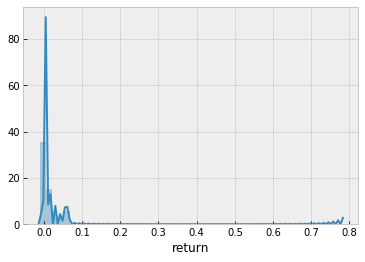

In [4]:
sns.distplot(data.train['return'])

### Measures of Skewness and Kurtosis
A fundamental task in many statistical analyses is to characterize the location and variability of a data set. A further characterization of the data includes skewness and kurtosis.

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case. 

Weibull Distribution 	The fourth histogram is a sample from a Weibull distribution with shape parameter 1.5. The Weibull distribution is a skewed distribution with the amount of skewness depending on the value of the shape parameter. The degree of decay as we move away from the center also depends on the value of the shape parameter. For this data set, the skewness is 6.94 and the kurtosis is 206.153220, which indicates moderate skewness and kurtosis.
Many classical statistical tests and intervals depend on normality assumptions. Significant skewness and kurtosis clearly indicate that data are not normal. If a data set exhibits significant skewness or kurtosis (as indicated by a histogram or the numerical measures), what can we do about it?

One approach is to apply some type of transformation to try to make the data normal, or more nearly normal. The Box-Cox transformation is a useful technique for trying to normalize a data set. In particular, taking the log or square root of a data set is often useful for data that exhibit moderate right skewness. 

In [5]:
print("Skewness: %f" % data.train['return'].skew())
print("Kurtosis: %f" % data.train['return'].kurt())

Skewness: 6.940001
Kurtosis: 206.153220


## WTF thats too large Kirtosis and skewness
Let me drop the oulier and check the values

Skewness: 1.847882
Kurtosis: 3.406496


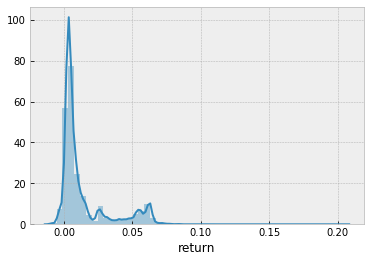

In [6]:
data.train = data.train.drop(1665)
print("Skewness: %f" % data.train['return'].skew())
print("Kurtosis: %f" % data.train['return'].kurt())
sns.distplot(data.train['return'])
data.train = data.train.drop(5236)
data.train = data.train.drop(2667)                          
data.train = data.train.drop(2668)       
data.train = data.train.drop(572)       
data.train = data.train.drop(573)       

In [7]:
data.train[data.train['sold'].isnull() == True]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,indicator_code,sell_date,type,hedge_value,status,return


#### YEah Now let me analyze the value
Changed The entire distubution

In [8]:
data.train[data.train['return'] > 0.2]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,indicator_code,sell_date,type,hedge_value,status,return
7096,PF00009234,DSK00006260,OFF00001001,A,20120424,13218700.0,T,0.00417,USD,0.948752,13200000.0,NaN,20120427,A,NaN,True,0.204


## Missing Value

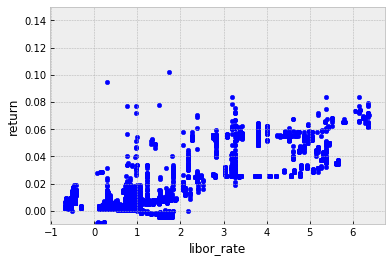

In [9]:
var = 'libor_rate'
temp_data = pd.concat([data.train['return'], data.train[var]], axis=1)
temp_data.plot.scatter(x=var, y='return', ylim=(-0.01,0.15));

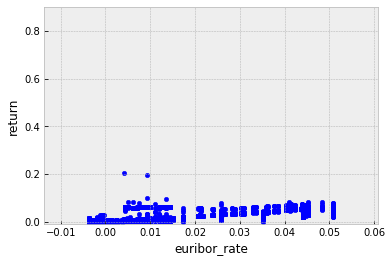

In [10]:
var = 'euribor_rate'
temp_data = pd.concat([data.train['return'], data.train[var]], axis=1)
temp_data.plot.scatter(x=var, y='return', ylim=(-0.01,0.9));

In [11]:
data.train.iloc[1665]

portfolio_id       PF00003550
desk_id           DSK00003268
office_id         OFF00001002
pf_category                 C
start_date           20090422
sold                 2.75e+07
country_code                M
euribor_rate          0.01105
currency                  CHF
libor_rate           0.767045
bought            2.74646e+07
indicator_code            NaN
sell_date            20090511
type                        E
hedge_value               NaN
status                    NaN
return              0.0173774
Name: 1668, dtype: object

In [12]:
# # I have seen the datetime of 1665 Test have diffent format
# for i in data.getCustom('date'):
#     data.test.iloc[1665][i]= np.datetime64(datetime.strptime(str(data.test.iloc[1665][i]),'%Y-%m-%d'))

for i in data.getCustom('date'):
    data.train[i] = pd.to_datetime(list(map(lambda x: np.datetime64(datetime.strptime(str(x),'%Y%m%d')), data.train[i].values)))
    data.test[i] = pd.to_datetime(list(map(lambda x: np.datetime64(datetime.strptime(str(x),'%Y%m%d')), data.test[i].values)))


## Relationship with categorical features

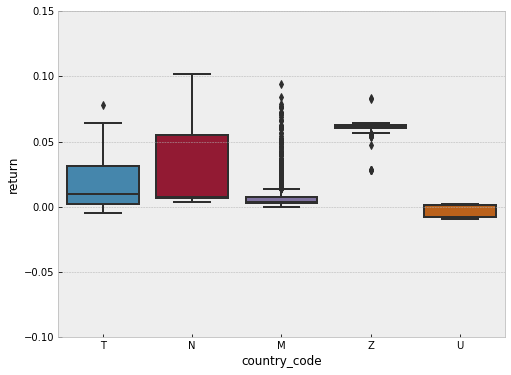

In [13]:
var = 'country_code'
temp_data = pd.concat([data.train['return'], data.train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="return", data=temp_data)
fig.axis(ymin=-0.1, ymax=0.15);

In [14]:
def extractDateTime(df,m=False,y=False,d=False):
    if m:
        return df.apply(lambda x: x.month)
    if y:
        return df.apply(lambda x: x.year)
    if d:
        return df.apply(lambda x: x.day)
for i in data.getCustom('date'):
    print(i)
    a = i.split('_')[0]
    day = a + '_day'
    month = a + '_month'
    year = a + '_year'
    data.addColumns(day,extractDateTime(data.train[i],d=True),extractDateTime(data.test[i],d=True),'mod')
    data.addColumns(month,extractDateTime(data.train[i],m=True),extractDateTime(data.test[i],m=True),'mod')
    data.addColumns(year,extractDateTime(data.train[i],y=True),extractDateTime(data.test[i],y=True),'mod')   
data.test[data.test['sell_month'].isnull()]

start_date
sell_date


,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,...,sell_date,type,hedge_value,status,start_day,start_month,start_year,sell_day,sell_month,sell_year


In [15]:
def box_plot(var,ymax=0.15):
    var = var
    temp_data = pd.concat([data.train['return'], data.train[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 5))
    fig = sns.boxplot(x=var, y="return", data=temp_data)
    fig.axis(ymin=-0.05, ymax=ymax);
    plt.xticks(rotation=90);

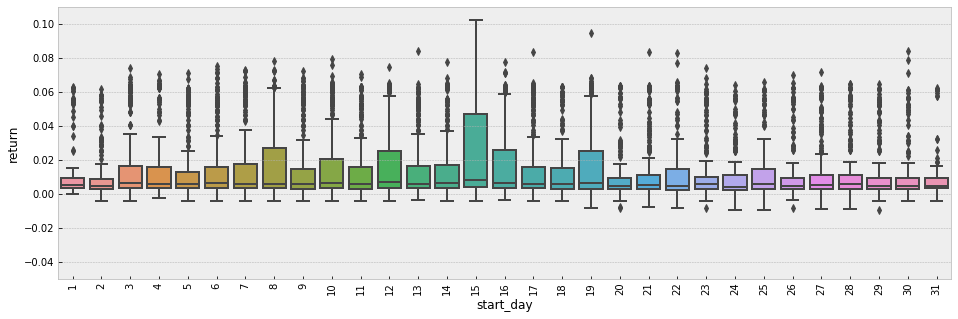

In [16]:
box_plot('start_day',0.11)

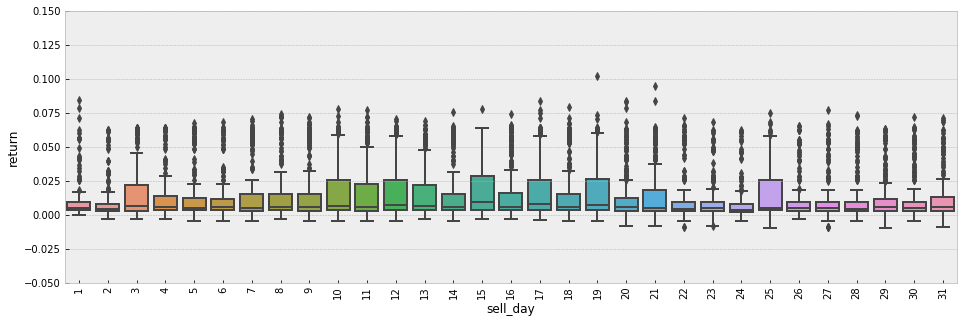

In [17]:
box_plot('sell_day',0.15)

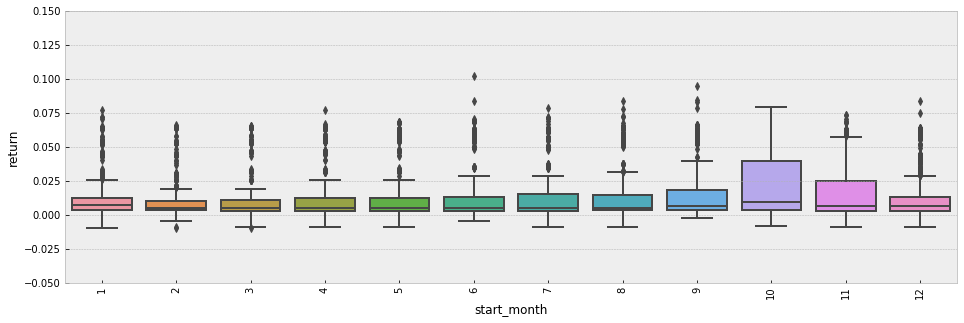

In [18]:
box_plot('start_month',0.15)

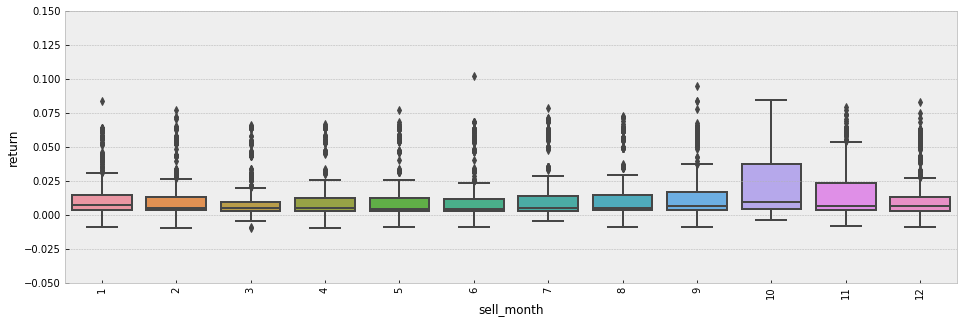

In [19]:
box_plot('sell_month',0.15)

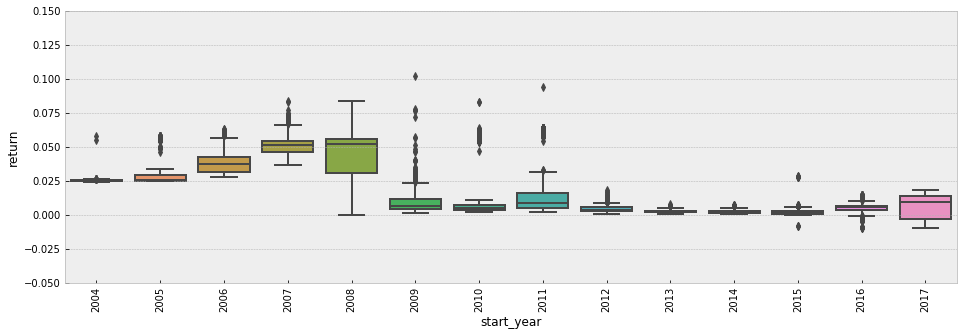

In [20]:
box_plot('start_year',0.15)

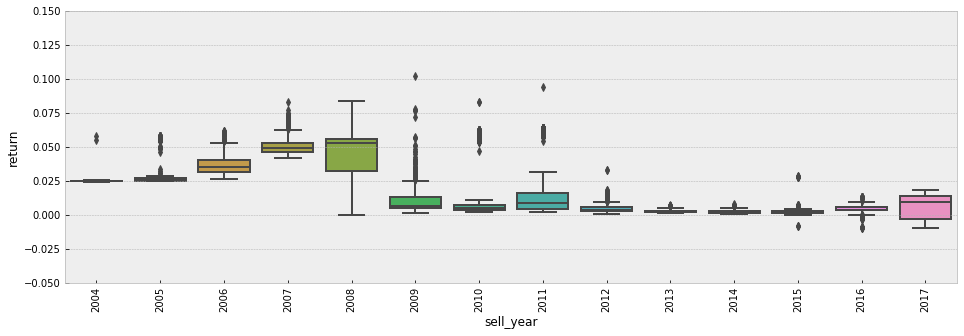

In [21]:
box_plot('sell_year',0.15)

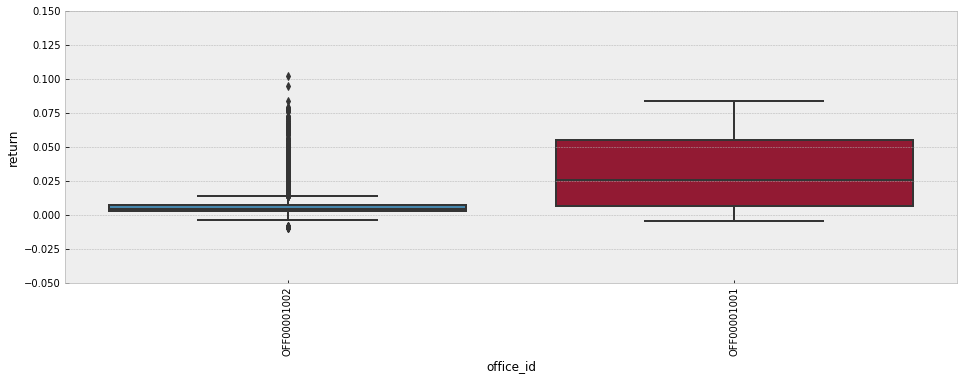

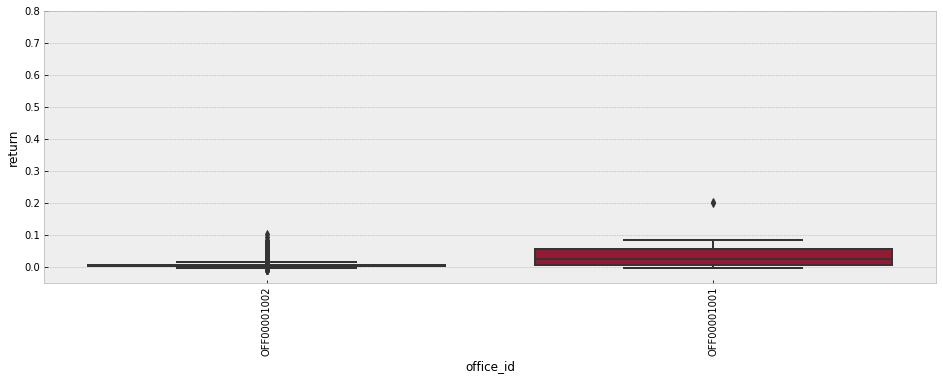

In [22]:
box_plot('office_id')
box_plot('office_id',0.8)

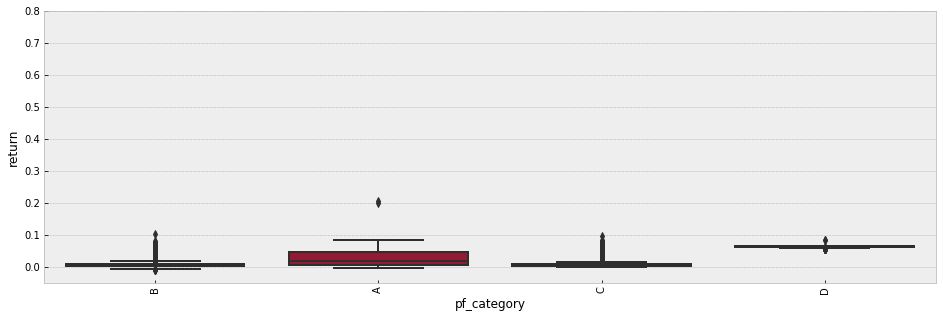

In [23]:
box_plot('pf_category',0.8)

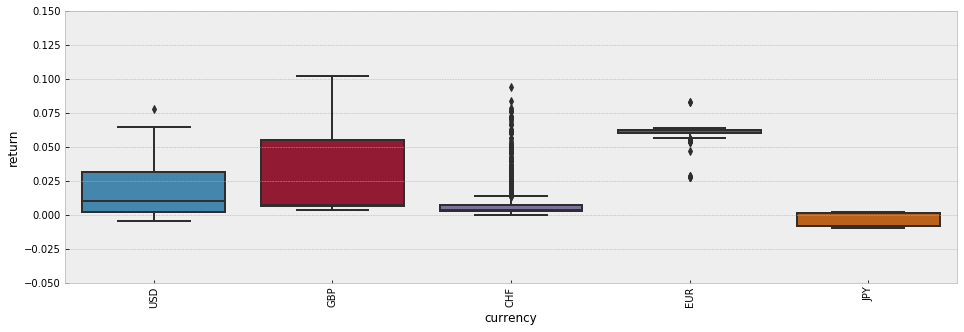

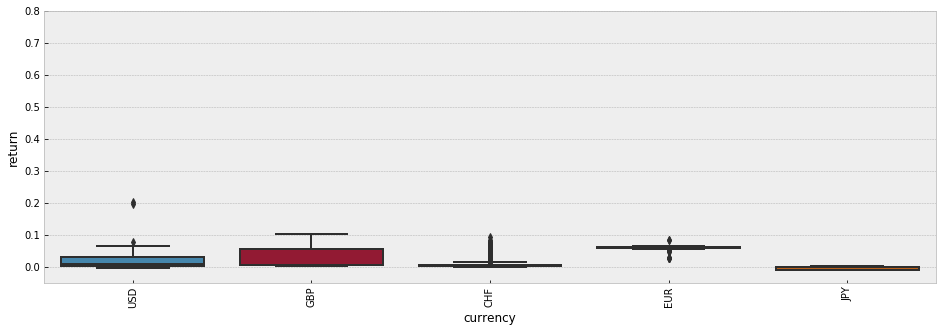

In [24]:
box_plot('currency')
box_plot('currency',0.8)

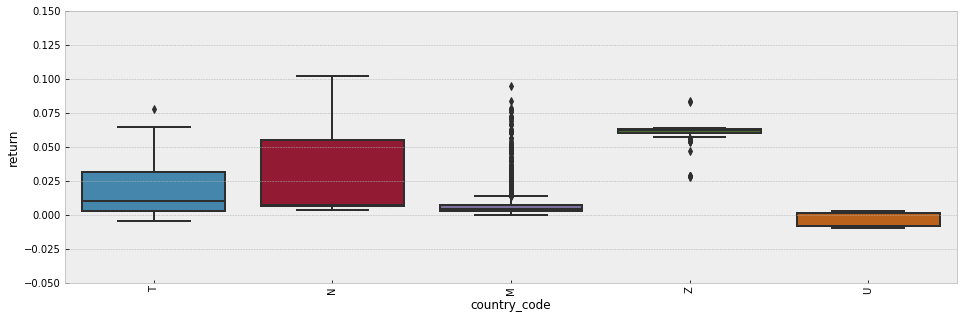

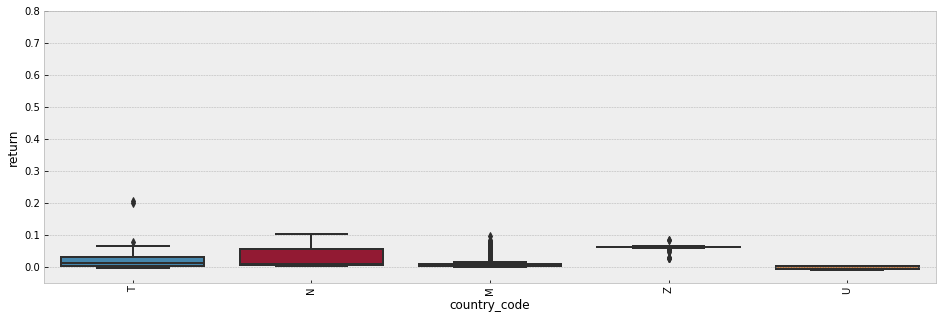

In [25]:
box_plot('country_code')
box_plot('country_code',0.8)

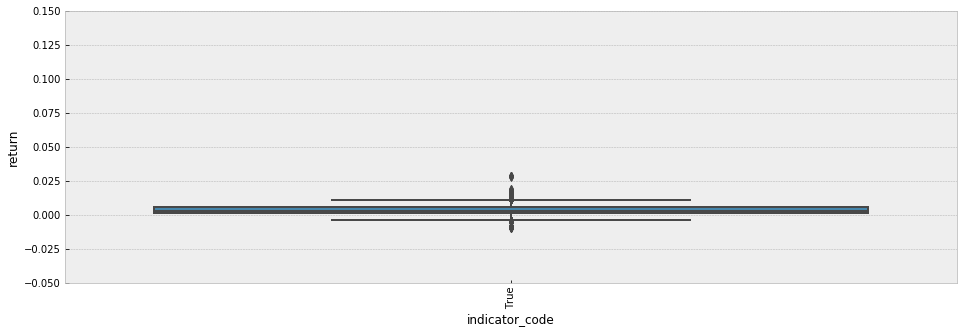

In [26]:
box_plot('indicator_code')


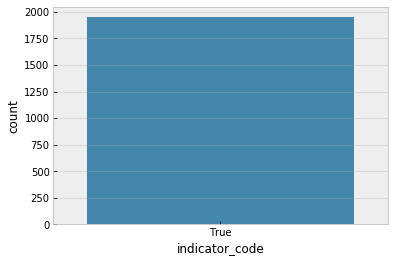

In [27]:
sns.countplot(data.test['indicator_code'])

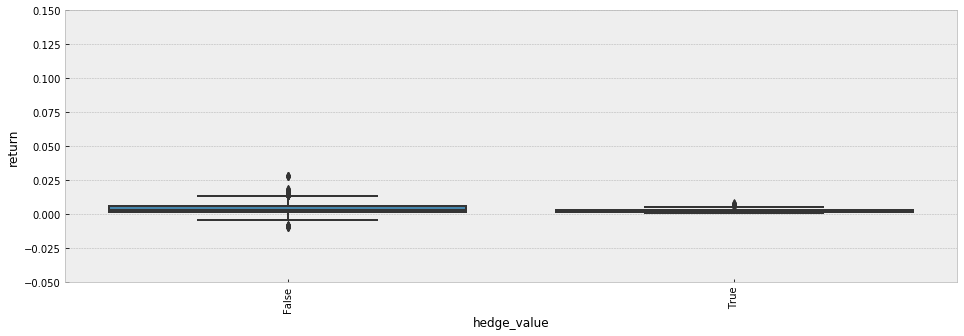

In [28]:
box_plot('hedge_value')

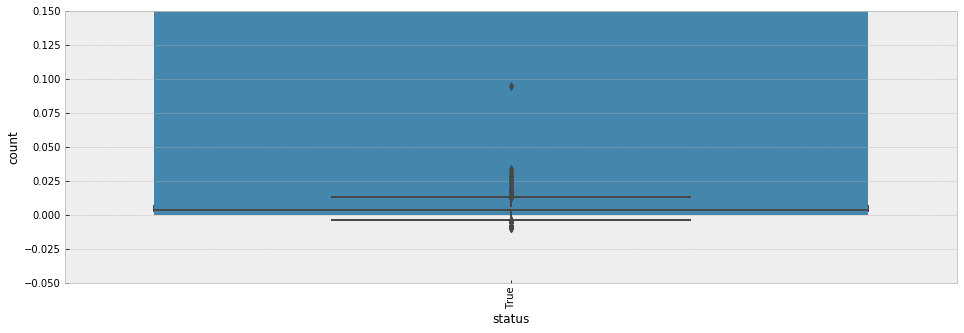

In [29]:
box_plot('status')
sns.countplot(data.test['status'])

In [30]:
total = data.train.isnull().sum().sort_values(ascending=False)
percent = (data.train.isnull().sum()/data.train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
hedge_value,5695,0.608440
indicator_code,5694,0.608333
desk_id,3664,0.391453
status,3078,0.328846
libor_rate,472,0.050427
office_id,0,0.000000
pf_category,0,0.000000
start_date,0,0.000000
sold,0,0.000000
country_code,0,0.000000


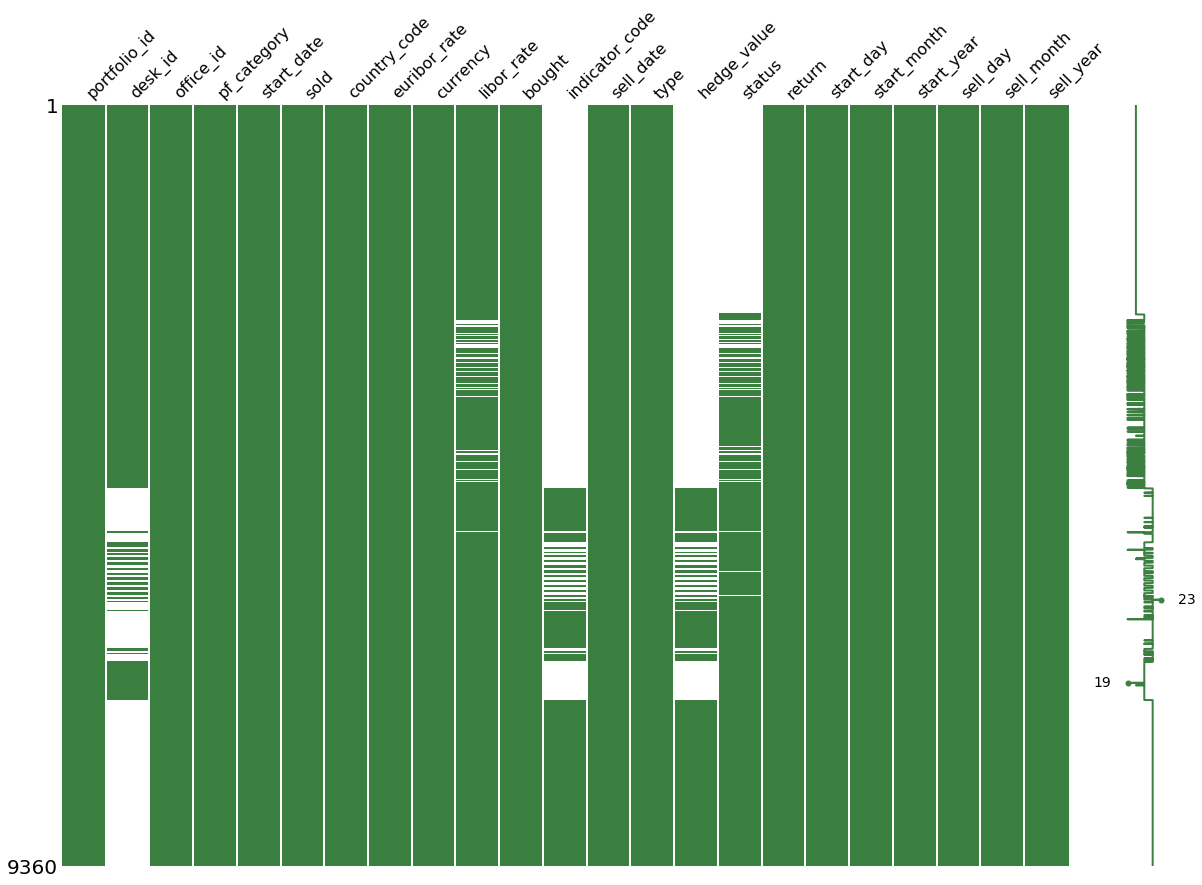

In [31]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=data.train.iloc[:], figsize=(20, 14), color=(0.23, 0.5, 0.25))



In [32]:

for i in ['status','indicator_code','desk_id','hedge_value']:
    trainMissing = np.zeros(data.train.shape[0],dtype=int)
    testMissing = np.zeros(data.test.shape[0],dtype=int)
    name = 'isMissing'+i
    data.addColumns(name,trainMissing,testMissing,'cat')
    data.train.ix[data.train[i].isnull()==True,name] = 1
    data.drop(i)

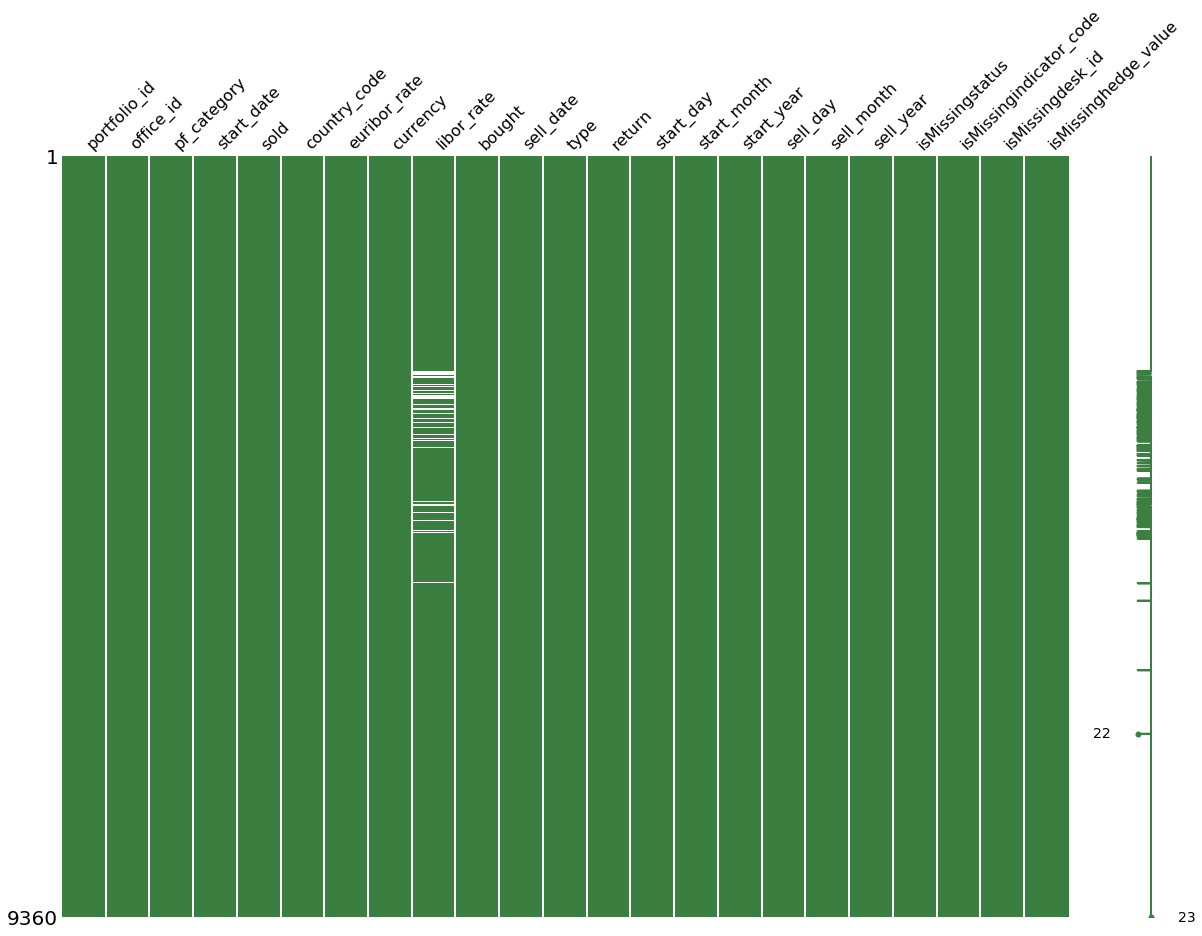

In [33]:
msno.matrix(df=data.train.iloc[:], figsize=(20, 14), color=(0.23, 0.5, 0.25))



In [34]:
for i in data.getCustom('date'):
    print(i)
    a = i.split('_')[0]
    name = a + '_week'
    data.addColumns(colName=name,trainData=data.train[i].apply(lambda x: x.weekday()),testData=data.test[i].apply(lambda x: x.weekday()),type='mod')

start_date
sell_date


In [35]:
def get_season(month):
    if 1<=month<=3:
        return 0
    elif 4<=month<=6:
        return 1
    elif 7<=month<=9:
        return 2
    elif 10<=month<=12:
        return 4
    else:
        raise TypeError('Month must be (1,..,12) ' + str(month))
for i in data.getCustom('month'):
    print(i)
    a = i.split('_')[0]
    name = a + 'season'
    data.addColumns(colName=name,trainData=data.train[i].apply(get_season),testData=data.test[i].apply(get_season),type='mod')   

start_month
sell_month


In [36]:
data.test.columns

Index(['portfolio_id', 'office_id', 'pf_category', 'start_date', 'sold',
       'country_code', 'euribor_rate', 'currency', 'libor_rate', 'bought',
       'sell_date', 'type', 'start_day', 'start_month', 'start_year',
       'sell_day', 'sell_month', 'sell_year', 'isMissingstatus',
       'isMissingindicator_code', 'isMissingdesk_id', 'isMissinghedge_value',
       'start_week', 'sell_week', 'startseason', 'sellseason'],
      dtype='object')

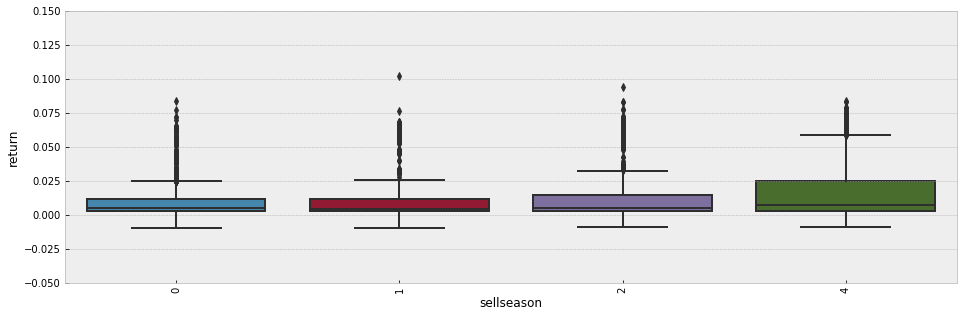

In [37]:
box_plot('sellseason')

#### Corelation

In [38]:
# plotHeatMap(data.train)

NameError: name 'plotHeatMap' is not defined

start-sell, creation-sell

In [ ]:
# data.train['sell-start'] = data.train['sell_date'] - data.train['start_date']
# data.test['sell-start'] = data.test['sell_date'] - data.test['start_date']

# data.train['sell-creation'] = data.train['sell_date'] - data.train['creation_date']
# data.test['sell-creation'] = data.test['sell_date'] - data.test['creation_date']

In [39]:
for i in data.getCustom('sell-'):
    data.train[i] = data.train[i].apply(lambda x: x.days)
    data.test[i] = data.test[i].apply(lambda x: x.days)

In [40]:
is_missing_train = np.zeros((data.train.shape[0],))
is_missing_test = np.zeros((data.test.shape[0],))
data.addColumns(colName='isMissinglibor',testData=is_missing_test,trainData=is_missing_train,type='cat')
data.test.ix[data.test['libor_rate'].isnull() == True,'isMissinglibor'] = 1
data.train.ix[data.train['libor_rate'].isnull() == True,'isMissinglibor'] = 1
data.test.ix[data.test['libor_rate'].isnull() == True,'libor_rate'] = np.nan
data.train.ix[data.train['libor_rate'].isnull() == True,'libor_rate'] = np.nan
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values=np.nan, strategy='mean', axis=0)
imr = imr.fit(data.train['libor_rate'].reshape(-1,1))
data.train['libor_rate'] = imr.transform(data.train['libor_rate'].reshape(-1,1))
data.test['libor_rate'] = imr.transform(data.test['libor_rate'].reshape(-1,1))

In [41]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.cross_validation import KFold

In [42]:
col = ['office_id', 'pf_category', 'sold',
       'country_code', 'euribor_rate', 'currency', 'libor_rate', 'bought', 'type','start_day',
       'start_month', 'start_year', 'creation_day', 'creation_month',
       'creation_year', 'sell_day', 'sell_month', 'sell_year',
       'isMissingstatus', 'isMissingindicator_code', 'isMissingdesk_id',
       'isMissinghedge_value', 'start_week', 'creation_week', 'sell_week',
       'startseason', 'creationseason', 'sellseason', 'sell-start',
       'sell-creation', 'isMissinglibor']
data.train.columns

Index(['portfolio_id', 'office_id', 'pf_category', 'start_date', 'sold',
       'country_code', 'euribor_rate', 'currency', 'libor_rate', 'bought',
       'sell_date', 'type', 'return', 'start_day', 'start_month', 'start_year',
       'sell_day', 'sell_month', 'sell_year', 'isMissingstatus',
       'isMissingindicator_code', 'isMissingdesk_id', 'isMissinghedge_value',
       'start_week', 'sell_week', 'startseason', 'sellseason',
       'isMissinglibor'],
      dtype='object')

In [43]:
target = data.train['return'].ravel()
train = data.train[col]
test= data.test[col]
encodeCol = [i for i in data.category + data.modular if i in col]
def encode(train,test,encodeCol):
    zeroTrain = np.zeros(train.shape[0])
    zeroTest = np.zeros(test.shape[0])
    for i in encodeCol:
        encoded = pd.get_dummies(train[i])
        encodedTest = pd.get_dummies(test[i])
        col = encoded.columns
        for j in col:
            name = str(i) + '_' + str(j)
            print(name)
#             train[name] = zeroTrain
#             test[name] = zeroTest
            train[name]=encoded[j]
            if j in encodedTest.columns:
                test[name]=encodedTest[j]
            else:
                test[name]=zeroTest
        train = train.drop(i,axis=1)
        test = test.drop(i,axis=1)
    return train,test
train,test = encode(train,test,encodeCol)

KeyError: "['creation_day' 'creation_month' 'creation_year' 'creation_week'\n 'creationseason' 'sell-start' 'sell-creation'] not in index"

In [ ]:
plotHeatMap(train)

In [ ]:
  def scaler(train,test,columns):
        from sklearn.preprocessing import StandardScaler
        for colName in columns:
            print(colName)
            std_scale = StandardScaler().fit(test[colName].reshape(-1,1))
            test[colName] = std_scale.transform(test[colName].reshape(-1,1))
            train[colName] = std_scale.transform(train[colName].reshape(-1,1))
        return train,test

In [ ]:
cont = ['euribor_rate','libor_rate','bought','sold']
train,test = scaler(train,test,cont)

In [ ]:
# rf_candidates = [
#    {'n_estimators':[5,10,20,30,50,100],
#      'max_depth':[5,8,15,None],
# #   'min_samples_split': [1,2,5,10,15,100],
#     'min_samples_leaf': [1,2,5,10,20,50,100],
#     'max_features':['log2','sqrt',None],
#     'n_jobs' : [-1]
    
#    }
# ]
# lr_candidates = [
#     {
#         'fit_intercept' : [True,False],
#         'normalize': [True,False]
#     }
# ]
# ls_candidates = [
#     {
#         'alpha': [0.1,1.0,10],
#         'normalize' : [True,False]
#     }
# ]
# svr_candidates=[
#     {
#         'c': [0.001,0.001,0.1,1,10,100,100],
#         'gamma': ['Auto',0.1,1,10]
#     }
# ]

In [ ]:
# param = {
#     'rf' : rf_candidates,
# #     'lr' : lr_candidates,
# #     'ls' : ls_candidates,
# #     'svr' : ls_candidates
# }
# from sklearn.linear_model import Lasso,LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# estimator = {
#               'rf':RandomForestRegressor(),
# #               'svr':SVR(),
# #               'lr':LinearRegression(),
# #               'ls':Lasso()
#             }

In [ ]:
Main_Train = train.values
Main_Test = test.values
Main_Train_target = target

In [ ]:
# def CustomGridSearch(estimators,param_grid,data,target):
#     result = {}
#     from sklearn.grid_search import GridSearchCV
#     for i in estimators:
#         clf = GridSearchCV(estimator=estimators[i],param_grid=param_grid[i],n_jobs=-1,verbose=1)
#         clf.fit(data,target)
#         result[i] = clf
#         print(clf.best_score_)
#     return result


In [ ]:
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(Main_Train, Main_Train_target, test_size=0.2, random_state=0)

In [ ]:
# pd.DataFrame(paramBest)

In [ ]:

# result = CustomGridSearch(estimators=estimator,param_grid=param,data=X_train,target=y_train)

In [ ]:
# rf = result['rf']

In [ ]:
# pred = final.predict(test)
# sub = pd.read_csv('../Data/sample_submission.csv')
# sub['return'] = pred
# sub['return'] = sub['return']
# sub[['portfolio_id','return']].to_csv('HugeStacking.csv', index=False)

In [ ]:
# a = rf.best_estimator_

In [ ]:
# a.fit(Main_Train,Main_Train_target)

In [ ]:
# pred = a.predict(Main_Test)

In [ ]:
# sub = pd.read_csv('../Data/sample_submission.csv')
# sub['return'] = pred
# sub['return'] = sub['return']
# sub[['portfolio_id','return']].to_csv('singleNewWS.csv', index=False)

In [ ]:
# score = pd.DataFrame(rf.grid_scores_)

In [ ]:
# params = dict(score[score['mean_validation_score'] > 0.9]['parameters'])

In [ ]:
# params

In [ ]:
# import ast
# paramBest = {}
# for i in params:
#     if params[i]['max_depth'] != None:
#         if params[i]['n_estimators'] > 50:
#             if params[i]['min_samples_leaf'] >= 50:
#                 paramBest[i] = params[i]

In [ ]:
# class SklearnHelper(object):
#     def __init__(self,clf,seed=0,params=None):
#         params['random_state'] = seed
#         self.clf = clf(**params)
        
#     def train(self,x_train,y_train):
#         return self.clf.fit(x_train,y_train)
        
#     def predict(self,x):
#         return self.clf.predict(x)
    
#     def fit(self,x,y):
#         return self.clf.fit(x,y)
    
#     def feature_importance(self,x,y):
#         return self.clf.fit(x,y).feature_importances_

In [ ]:
# ntest = data.test.shape[0]
# ntrain = data.train.shape[0]
# SEED = 1020
# NFOLDS = 4
# kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)
# def get_oof(clf, x_train, y_train, x_test):
#     oof_train = np.zeros((ntrain,))
#     oof_test = np.zeros((ntest,))
#     oof_test_skf = np.empty((NFOLDS,ntest))
#     print('Tranning New Model')
#     for i,(train_index,test_index) in enumerate(kf):
#         print('Tranning New Fold')
#         x_tr = x_train[train_index]
#         y_tr = y_train[train_index]
#         x_te = x_train[test_index]
        
#         clf.train(x_tr,y_tr)
#         oof_train[test_index] = clf.predict(x_te)
#         oof_test_skf[i, :] = clf.predict(x_test)
        
#     oof_test[:] = np.mean(oof_test_skf,axis=0)#89 WITH MINSAMPLE iNCLUDED
# result = CustomGridSearch(estimators=estimator,param_grid=param,data=X_train,target=y_train)
#     return oof_train.reshape(-1,1),oof_test.reshape(-1,1)

In [ ]:
# models = {}
# for i in paramBest:
#     paramBest[i]['n_jobs'] = -1
#     models[i] = SklearnHelper(clf=RandomForestRegressor,params=paramBest[i])

In [ ]:
# metaFeatures = {}
# y_train = target.ravel()
# x_train = train.values # Creates an array of the train data
# x_test = test.values # Creats an array of the test data
# for i in models:
#     metaFeatures[i] = get_oof(models[i], x_train,y_train, x_test)

In [ ]:
# base_train = {}
# base_test = {}
# for i in metaFeatures:
#     base_train[i] = metaFeatures[i][0].ravel()
#     base_test[i] = metaFeatures[i][1].ravel()

In [ ]:
# base_train = pd.DataFrame(base_train)
# base_test = pd.DataFrame(base_test)

In [ ]:
# train = base_train.values
# test = base_test.values
# target = target

In [ ]:
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=0)

In [ ]:
# #89 WITH MINSAMPLE iNCLUDED
# result = CustomGridSearch(estimators=estimator,param_grid=param,data=X_train,target=y_train)